线性搜索:这是一种关于步长$\alpha$的选定方法

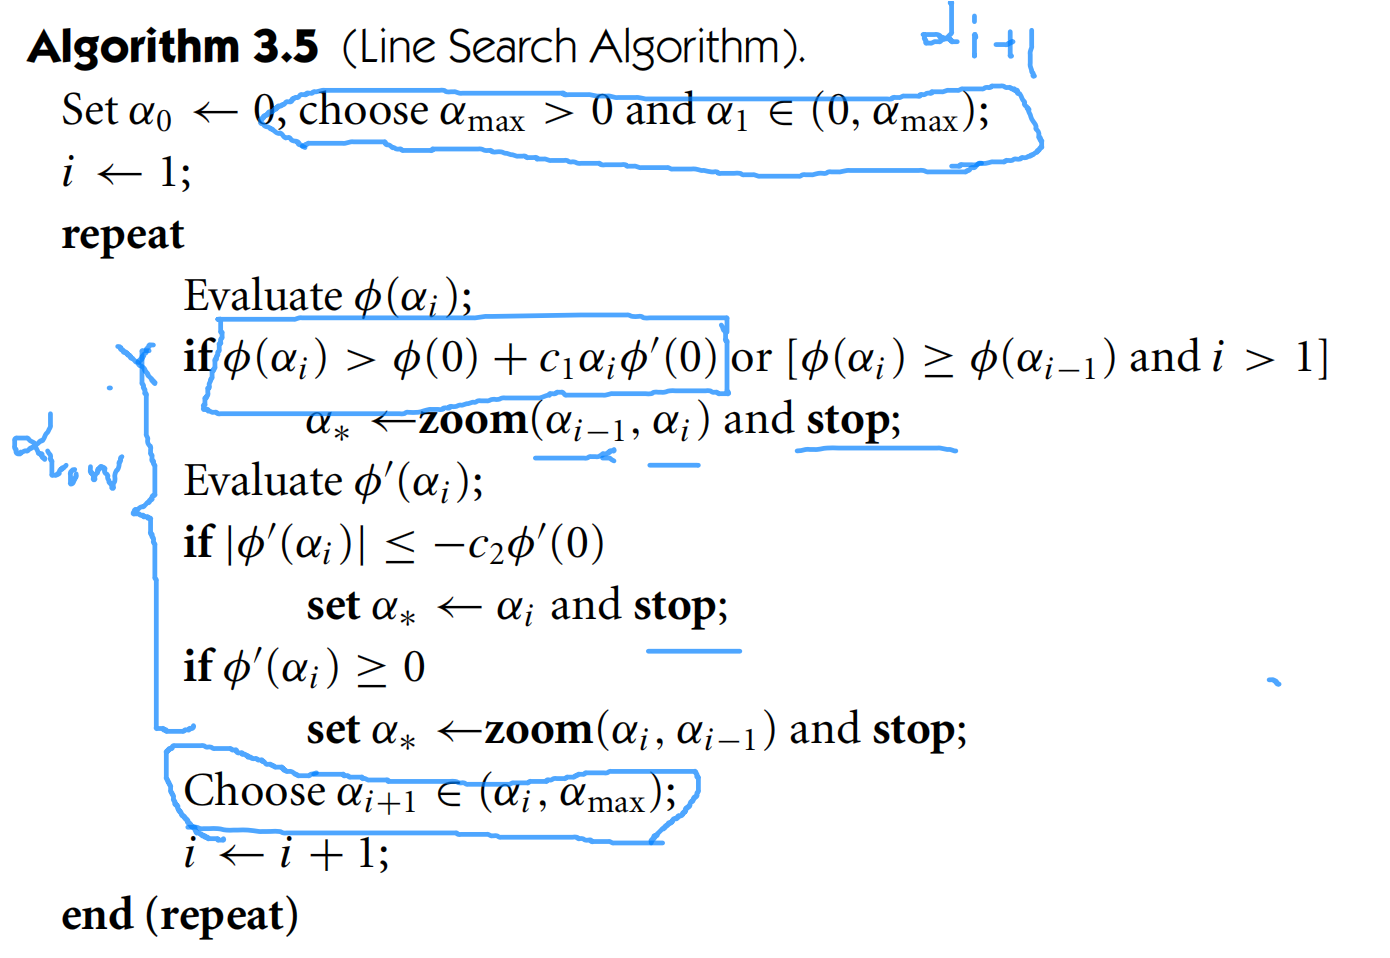

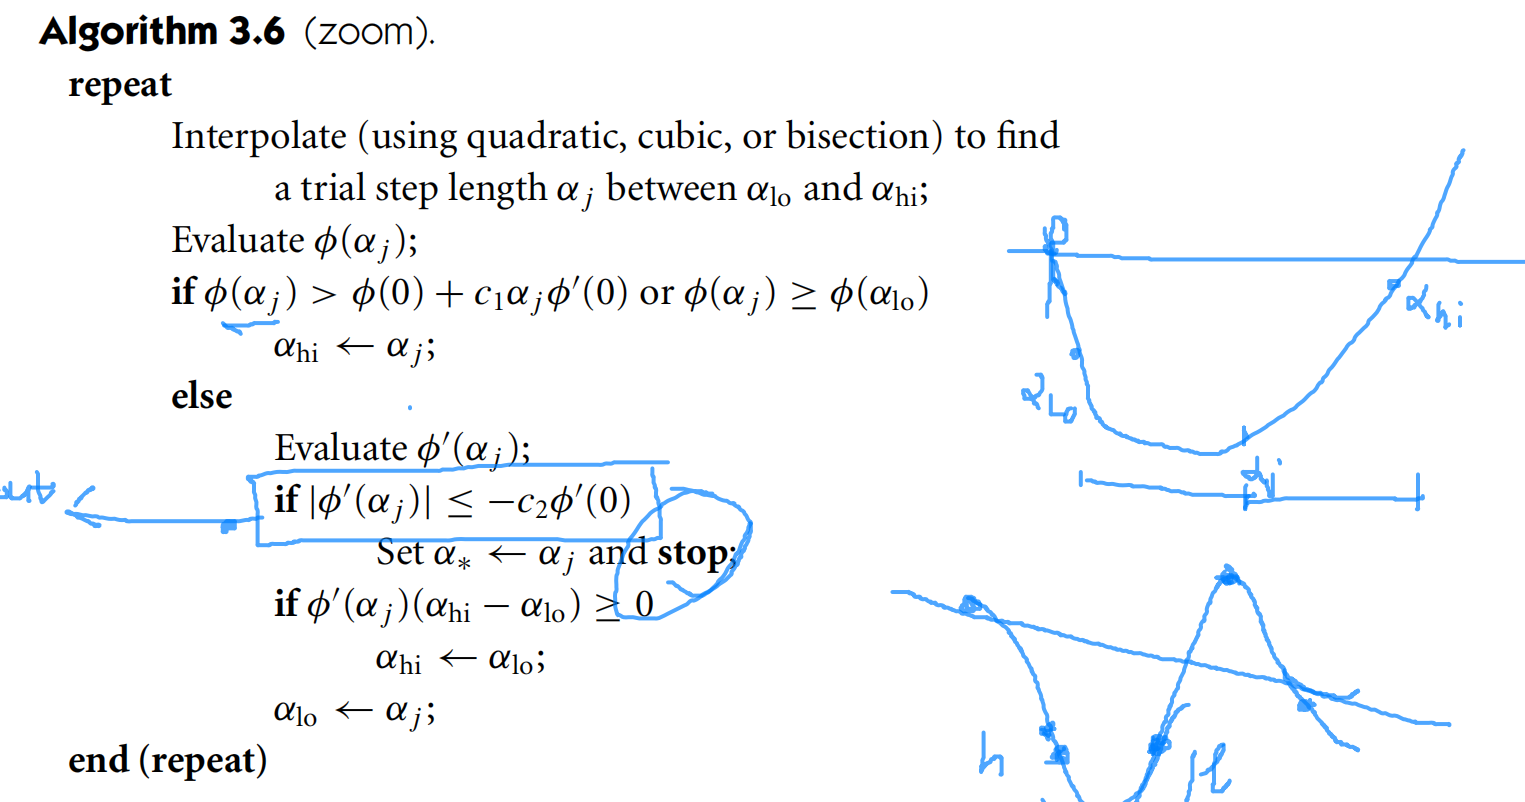

In [25]:
import numpy as np

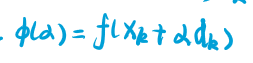
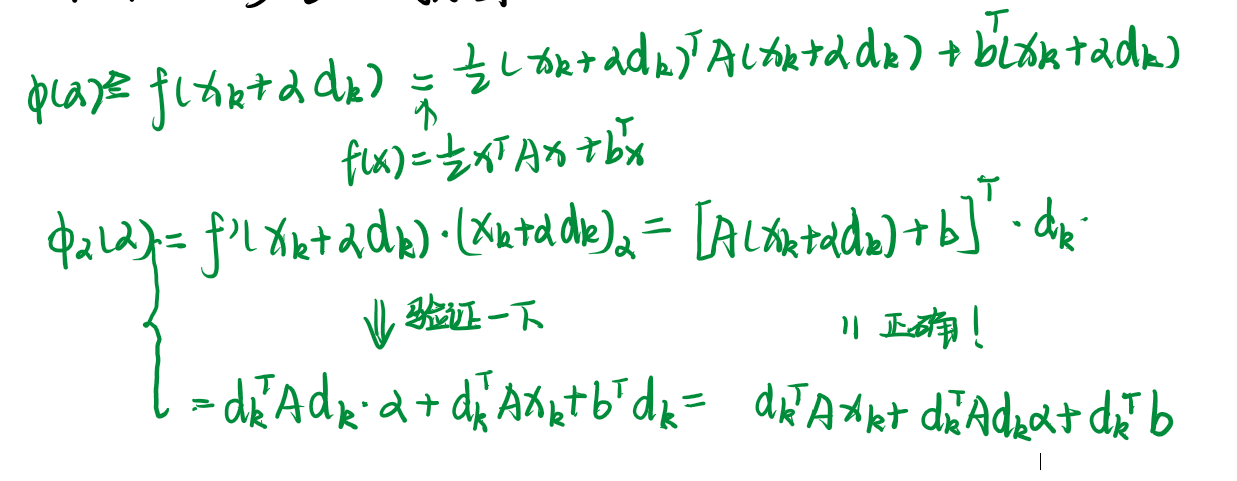

In [26]:
def Function(x,**kwargs):
    "(x,alpha,d)"
    """Function用于计算在该函数某点的值与梯度向量(关于步长alpha的偏导)(与Hessian矩阵)"""
    #这里用一个二次向量式作为例子
    #x:n维向量；A：某不知名正定矩阵
    #A@B等价于np.dot(A,B)
    #A.T=np.transpose(A)

    A,b=np.array([[1,2],[2,1]]),np.array([4,5])
    F_Value=0.5*x.T@A@x+b.T@x#F(x)
    F_Gradient=A@x+b#GradF(x)

    F_Partial_alpha = None
    if 'd' in kwargs and 'alpha' in kwargs:
        d = kwargs['d']
        alpha = kwargs['alpha']
        F_Partial_alpha=d.T@(A@(x+alpha*d)+b)#Partial_alpha_F(x+alpha*d)
    
    return [F_Value,F_Gradient,F_Partial_alpha]
    

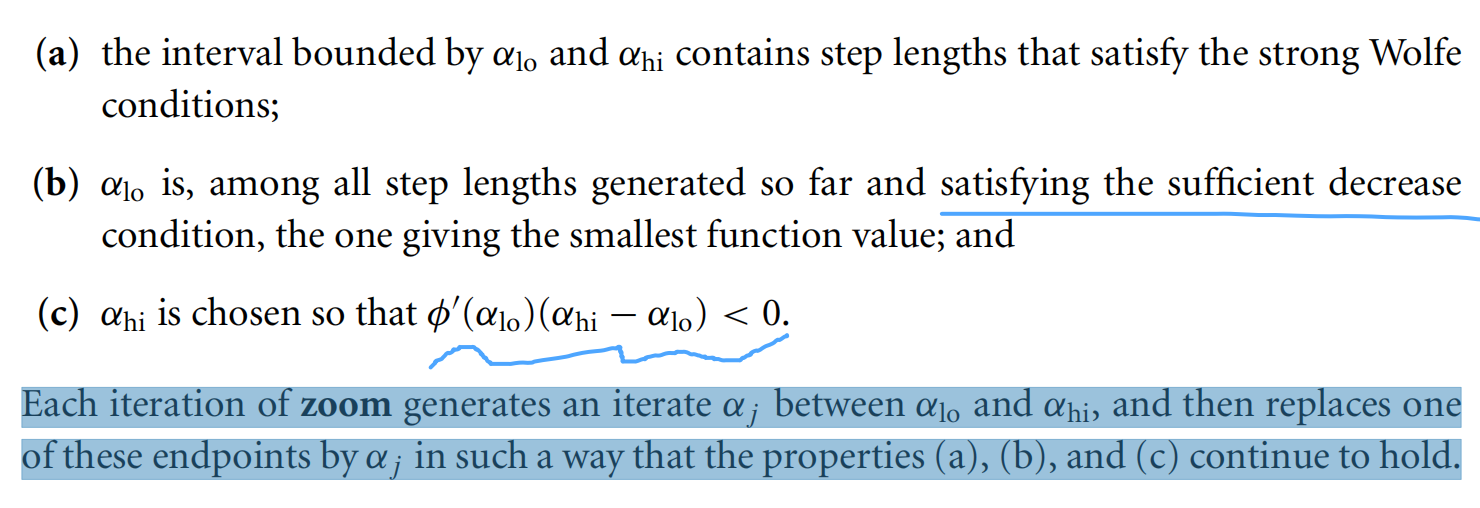

In [27]:
def Zoom(alpha_lo,alpha_hi):
    """用于求解合适的步长alpha"""
    #插值（使用二次、三次或二分）来找到alpha_lo和alpha_hi之间的试验步长alpha_j；这里使用二分
    """复用全局x,d,c1,c2,iteration_Max"""
    i=1
    while i<=iteration_Max:
        alpha=(alpha_lo+alpha_hi)/2
        [Phi_alpha,_,phi_alpha_p],[Phi_0,_,phi_0_p]=Function(x,alpha=alpha,d=d),Function(x,alpha=0,d=d)
        [Phi_alpha_lo,_,_]=Function(x,alpha=alpha_lo,d=d)
        if Phi_alpha>Phi_0+c1*alpha*phi_0_p or Phi_alpha>=Phi_alpha_lo:
            alpha_hi=alpha
        else:
            if abs(phi_alpha_p)<=-c2*phi_0_p:return alpha
            if phi_alpha_p*(alpha_hi-alpha_lo)>=0:alpha_hi=alpha_lo
        alpha_hi=alpha_lo
        i+=1
        
    return alpha

In [28]:
def LineSearch(alpha_max,x,d,iteration_Max):
    """LineSearch用于找到介于(alpha_min,alpha_max)之间满足上图的alpha"""
    #x,d为用于传入Function做参数的值
    #这里常数c1,c2直接全局定义，就不作为传参了
    
    alpha_old=0
    alpha=(alpha_old+alpha_max)/2
    i=1
    while i<=iteration_Max:
        [Phi_alpha,_,phi_alpha_p],[Phi_0,_,phi_0_p]=Function(x,alpha=alpha,d=d),Function(x,alpha=0,d=d)
        
        if Phi_alpha>Phi_0+c1*alpha*phi_0_p or (Phi_alpha>=Phi_alpha_old and i>1):
            return Zoom(alpha_old,alpha)
        if abs(phi_alpha_p)<=-c2*phi_0_p:
            return alpha
        if phi_alpha_p>=0:
            return Zoom(alpha,alpha_old)
        
        Phi_alpha_old=Phi_alpha
        alpha_old=alpha
        alpha=(alpha+alpha_max)/2
        i+=1
    return False
    
    


# Main Program

In [29]:
"""最速下降法测试LineSearch(直接用梯度反方向作为迭代方向)"""
c1,c2=1e-4,0.9
iteration_Max=10
expect_error=0.01
#初始化
np.random.seed(20240925)
F_value_record,x_vector_record,alpha_best_record=[],[],[]
x=np.random.rand(2)
[F_Value,F_Gradient,_]=Function(x)
d=F_Gradient
#经验取值
A=np.array([[1,2],[2,1]])
eigenvalues,_ = np.linalg.eig(A)
max_eigenvalue = np.max(eigenvalues)
alpha_max=2/np.sqrt(max_eigenvalue)
#开始循环
F_value_record.append(F_Value)
x_vector_record.append(x)

i=1
while i<=iteration_Max and np.linalg.norm(F_Gradient)>=expect_error:
    [F_Value,F_Gradient,_]=Function(x)
    alpha_best = LineSearch(alpha_max,x,-F_Gradient,iteration_Max)
    x=x-alpha_best*F_Gradient
    i+=1

    F_value_record.append(F_Value)
    x_vector_record.append(x)
    alpha_best_record.append(alpha_best)

